In [30]:
# import the necessary packages

from skimage.metrics import structural_similarity
import imutils
import cv2

import matplotlib.pyplot as plt
%matplotlib inline


In [31]:
plt.rcParams['figure.figsize'] = [15, 10]

In [32]:

image_one = cv2.imread("F:/pythonProject/Spot the difference/Assets/Images/Input/Input.jpeg")
image_two = cv2.imread("F:/pythonProject/Spot the difference/Assets/Images/Output/medium_output.jpeg")

# Resize the images to a smaller size
image_one = cv2.resize(image_one, (640, 480))
image_two = cv2.resize(image_two, (640, 480))

gray1 = cv2.cvtColor(image_one, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image_two, cv2.COLOR_BGR2GRAY)

In [33]:
# Tìm điểm khác nhau giữa 2 hình 
(score, diff) = structural_similarity(gray1, gray2, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM {}".format(score))


SSIM 0.9659979909415827


In [34]:
thresh = cv2.threshold(diff, 0, 128, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) [1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

Num of differences = 6


-1

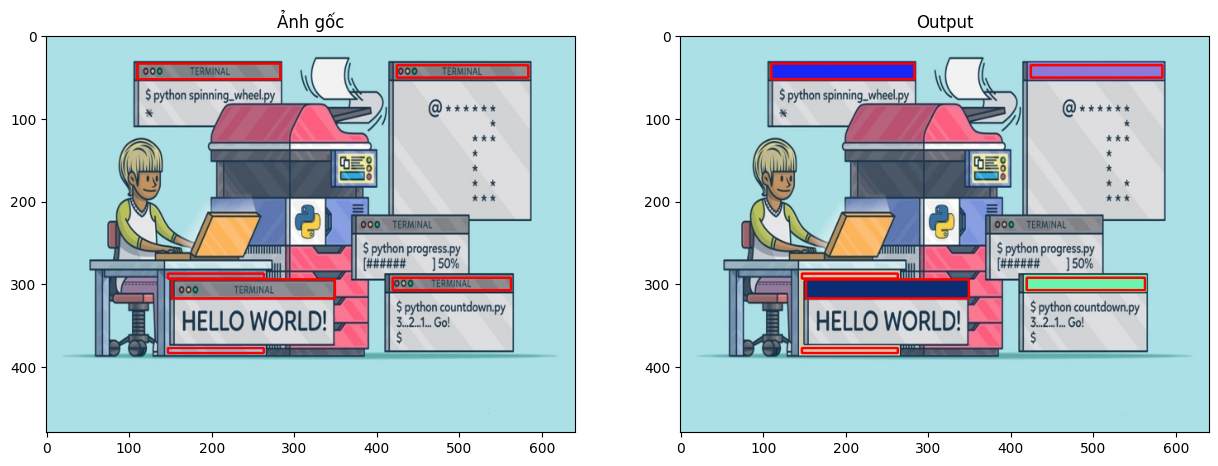

In [35]:
no_of_differences = 0
for c in cnts:
    (x, y, w, h ) = cv2.boundingRect(c)
    rect_area = w*h
    if rect_area > 20:
        no_of_differences += 1
        cv2.rectangle(image_one, (x, y), (x + w, y + h), (0, 0, 255), 2)
        cv2.rectangle(image_two, (x, y), (x + w, y + h), (0, 0, 255), 2)
print("Num of differences =", no_of_differences)

plt.subplot(1, 2, 1)
plt.imshow(image_one[:,:,::-1])
plt.title("Ảnh gốc")
plt.subplot(1, 2, 2)
plt.imshow(image_two[:,:,::-1])
plt.title("Output")

cv2.waitKey(0)
        

